<a href="https://colab.research.google.com/github/iam-fern/Research/blob/main/ex_sampling_generate_data_n50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
clear

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm

from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('https://github.com/iam-fern/Research/raw/main/sampling_generate_data_n50.csv', index_col=['rep', 'index'])
df

Xt1       Xt2       Xt3  ...          Y     y_hat      e_hat
rep  index                                ...                                
1.0  0.0   -0.166570  2.187389 -0.235378  ... -31.132483  6.486616 -37.619099
     1.0   -0.610359  0.816979 -0.261239  ...   3.908394  4.076313  -0.167919
     2.0    2.019648  0.099371 -0.377634  ...   3.597471  3.598836  -0.001365
     3.0    0.018843  0.562306 -0.046034  ...   4.784088  4.712345   0.071743
     4.0    0.243067 -0.291029 -0.463773  ...   1.997624  1.960124   0.037500
...              ...       ...       ...  ...        ...       ...        ...
99.0 45.0  -2.030709 -0.251461 -1.558500  ...  -2.799578 -2.859446   0.059868
     46.0   0.421567  0.193854  1.231342  ...   8.894360  8.923815  -0.029455
     47.0   0.427431  0.453588 -0.439712  ...   3.292166  3.283051   0.009114
     48.0   2.097895 -0.483763  1.338211  ...   8.948319  8.931327   0.016991
     49.0   1.285904 -0.614629  1.702361  ...   9.870317  9.717039   0.153279

[4950 rows x 7 columns]

In [4]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

Xt1       Xt2       Xt3  ...          Y     y_hat      e_hat
rep  index                                ...                                
1.0  0.0   -0.166570  2.187389 -0.235378  ... -31.132483  6.486616 -37.619099
     1.0   -0.610359  0.816979 -0.261239  ...   3.908394  4.076313  -0.167919
     2.0    2.019648  0.099371 -0.377634  ...   3.597471  3.598836  -0.001365
     3.0    0.018843  0.562306 -0.046034  ...   4.784088  4.712345   0.071743
     4.0    0.243067 -0.291029 -0.463773  ...   1.997624  1.960124   0.037500
...              ...       ...       ...  ...        ...       ...        ...
99.0 45.0  -2.030709 -0.251461 -1.558500  ...  -2.799578 -2.859446   0.059868
     46.0   0.421567  0.193854  1.231342  ...   8.894360  8.923815  -0.029455
     47.0   0.427431  0.453588 -0.439712  ...   3.292166  3.283051   0.009114
     48.0   2.097895 -0.483763  1.338211  ...   8.948319  8.931327   0.016991
     49.0   1.285904 -0.614629  1.702361  ...   9.870317  9.717039   0.153279

[4950 rows x 7 columns]

In [5]:
table.reset_index(inplace=True)
table

,rep,index,Xt1,Xt2,Xt3,e,Y,y_hat,e_hat
0,1.0,0.0,-0.166570,2.187389,-0.235378,-37.499579,-31.132483,6.486616,-37.619099
1,1.0,1.0,-0.610359,0.816979,-0.261239,-0.132469,3.908394,4.076313,-0.167919
2,1.0,2.0,2.019648,0.099371,-0.377634,0.000037,3.597471,3.598836,-0.001365
3,1.0,3.0,0.018843,0.562306,-0.046034,0.098815,4.784088,4.712345,0.071743
4,1.0,4.0,0.243067,-0.291029,-0.463773,0.006523,1.997624,1.960124,0.037500
...,...,...,...,...,...,...,...,...,...
4945,99.0,45.0,-2.030709,-0.251461,-1.558500,0.000499,-2.799578,-2.859446,0.059868
4946,99.0,46.0,0.421567,0.193854,1.231342,0.002119,8.894360,8.923815,-0.029455
4947,99.0,47.0,0.427431,0.453588,-0.439712,0.023774,3.292166,3.283051,0.009114
4948,99.0,48.0,2.097895,-0.483763,1.338211,0.017246,8.948319,8.931327,0.016991


In [6]:
table.set_index(['rep', 'index'], inplace=True)

In [7]:
table

Xt1       Xt2       Xt3  ...          Y     y_hat      e_hat
rep  index                                ...                                
1.0  0.0   -0.166570  2.187389 -0.235378  ... -31.132483  6.486616 -37.619099
     1.0   -0.610359  0.816979 -0.261239  ...   3.908394  4.076313  -0.167919
     2.0    2.019648  0.099371 -0.377634  ...   3.597471  3.598836  -0.001365
     3.0    0.018843  0.562306 -0.046034  ...   4.784088  4.712345   0.071743
     4.0    0.243067 -0.291029 -0.463773  ...   1.997624  1.960124   0.037500
...              ...       ...       ...  ...        ...       ...        ...
99.0 45.0  -2.030709 -0.251461 -1.558500  ...  -2.799578 -2.859446   0.059868
     46.0   0.421567  0.193854  1.231342  ...   8.894360  8.923815  -0.029455
     47.0   0.427431  0.453588 -0.439712  ...   3.292166  3.283051   0.009114
     48.0   2.097895 -0.483763  1.338211  ...   8.948319  8.931327   0.016991
     49.0   1.285904 -0.614629  1.702361  ...   9.870317  9.717039   0.153279

[4950 rows x 7 columns]

In [9]:
# แสดงค่าของ Replicate ที่ 1.0
new_table = table.loc[27]
new_table

,Xt1,Xt2,Xt3,e,Y,y_hat,e_hat
index,,,,,,,
0.0,1.387356,0.049950,-0.603306,7.343691e-06,2.457973,2.449397,0.008576
1.0,1.438809,-0.349053,0.119044,-4.309558e-03,4.476192,4.462374,0.013818
2.0,-1.384359,0.337716,0.694524,-4.096230e-04,6.452707,6.475299,-0.022593
3.0,0.034496,-0.770039,-0.348275,-5.626158e-01,1.042335,1.546781,-0.504446
4.0,-1.055642,-1.939689,-0.808398,-7.474735e+00,-9.716759,-2.383423,-7.333336
5.0,2.431391,0.354353,0.081432,1.137478e-02,5.808615,5.824475,-0.015860
6.0,-0.481764,-1.109185,0.521147,-2.395352e+00,1.624296,3.955968,-2.331672
7.0,0.986033,-0.670596,0.128174,-1.169584e-01,3.732988,3.810930,-0.077942
8.0,-0.442938,-0.333479,-0.478392,2.516426e-02,1.625558,1.563733,0.061825


In [10]:
new_table.mean()

Xt1      0.297034
Xt2      0.056129
Xt3      0.041208
e        0.924905
Y        5.276258
y_hat    4.351101
e_hat    0.925158
dtype: float64

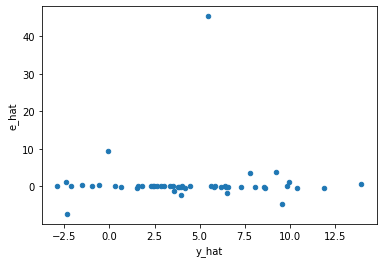

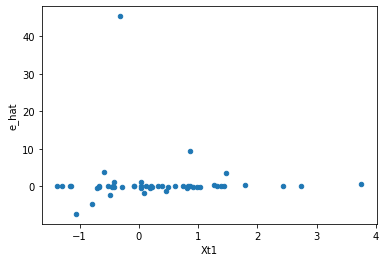

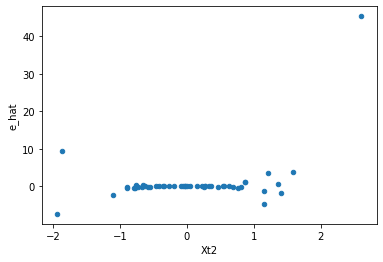

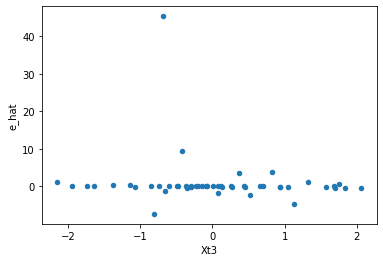

In [12]:
new_table.plot(x ='y_hat', y='e_hat', kind = 'scatter')
new_table.plot(x ='Xt1', y='e_hat', kind = 'scatter')
new_table.plot(x ='Xt2', y='e_hat', kind = 'scatter')
new_table.plot(x ='Xt3', y='e_hat', kind = 'scatter')